# A pySRIM model for radiation-damage in Superconducting REBCO tapes

This Jupyter Notebook describes the setup of a SRIM simulation with pysrimcc.py, a module based on the pySRIM library to study ion beam interactions with coated-conductor, also known as tapes. 

### Superconducting tapes of Rare-Earth Barium Copper Oxide (REBCO)

Tapes are the industrial form of Rare-Earth Barium Copper Oxides Superconductors. This material, discovered in the late 1980s can carry very large currents in high-magnetic fields and has a surprisingly high superconducting transition temperature between 90 and 120 K. It is the ideal candidate for applications like magnetic fusion energy, high-energy physics and space applications where packing a lot of magnetic fields in a small volume is desired! But, the high-energy particles present in these environments can cause displacements, and deposit impurities and heat in the materials, all of which affects its performance, i.e., critical current density at a given temperature and magnetic field.

Tapes have typically several layers, including:

* An external copper jacket (10-40 um)
* An external silver jacket (1-2 um)
* A REBCO layer (1-4 um)
* Buffer layers (up to 1 um of different materials)
* A structural steel (typically Hastelloy) substrate (15-60 um)

### What this Notebook can do

This notebook provides a template, as well as input data (such as displacement threshold energies) and useful functions to perform SRIM calculations of: 

* incident particle range (A),
* damage (vac/A-ion or DPA),
* impurities (ions/A),
* and heat (GW/m3)

In this example, the Faraday Factory Japan architecture is used:



In [1]:
%pylab inline
import sys
sys.path.append('pysrimcc')
import pysrimcc
from importlib import reload
reload(pysrimcc)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<module 'pysrimcc' from 'C:\\Users\\DANTE\\Desktop\\pysrimcc\\pysrimcc.py'>

## Quick example to demonstrate the functionality

Aggregated and raw output files will be saved to the *example/* folder.

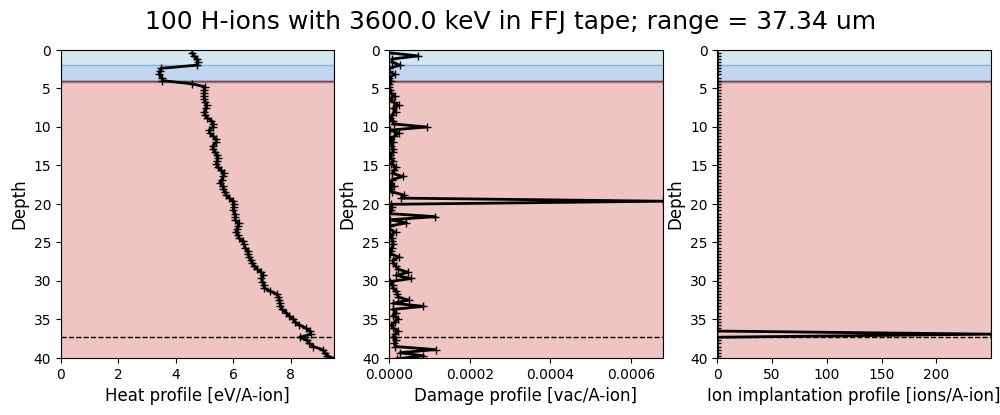

In [13]:
savedir = "C:/Users/DANTE/Desktop/pysrimcc/example/"

species, energy, nions, tape = 'H', 1200e3, 300, 'ffj-full'
path_to_tape = "C:/Users/DANTE/Desktop/pysrimcc/{}.json".format(tape)

bounds, data = pysrimcc.runSRIM(species=species, energy=energy, ionsFlown=nions, path_to_tape=path_to_tape, calculation=1, savedir=savedir, vb=False)
pysrimcc.plotResults(bounds, data, species, energy, nions, tape)

### Speed test for pysrim with 1.2 MeV H in REBCO

#### 1) Increasing the number of ions

### Full Faraday Tape

(40, 1)

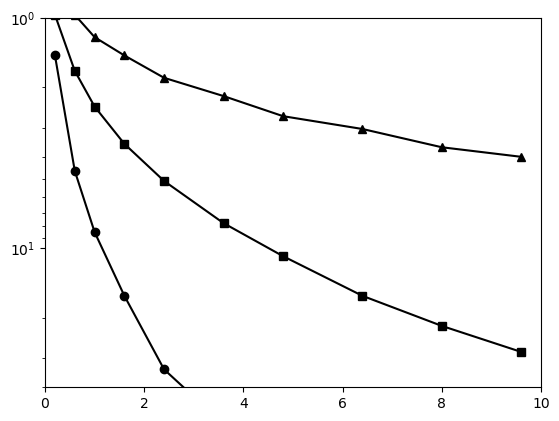

In [13]:
import pandas as pd

data = {
    'rng' : [14580.0, 27945.0, 46170.0, 64395.0, 85050.0, 112420.0, 160600.0, 220825.0, 334565.0, 425810.0, 577885.0, 699545.0, 851620.0, 1094940.0, 1368680.0, 1612000.0, 1916150.0, 2220300.0, 2585280.0, 9720.01, 13365.0, 17010.0, 20655.0, 24300.0, 27945.0, 35235.0, 43740.0, 51030.0, 64395.0, 77760.0, 92340.0, 108135.0, 136510.0, 160600.0, 188705.0, 216810.0, 244915.0, 281050.0, 6075.01, 8505.01, 9720.01, 10935.0, 12150.0, 13365.0, 14580.0, 17010.0, 18225.0, 19440.0, 21870.0, 24300.0, 26730.0, 27945.0, 30375.0, 32805.0, 36450.0, 37665.0, 40095.0],
    'species' : ['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'He', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
    'energy' : [200000.0, 400000.0, 600000.0, 800000.0, 1000000.0, 1200000.0, 1600000.0, 2000000.0, 2400000.0, 3000000.0, 3600000.0, 4200000.0, 4800000.0, 5600000.0, 6400000.0, 7200000.0, 8000000.0, 8800000.0, 9600000.0, 200000.0, 400000.0, 600000.0, 800000.0, 1000000.0, 1200000.0, 1600000.0, 2000000.0, 2400000.0, 3000000.0, 3600000.0, 4200000.0, 4800000.0, 5600000.0, 6400000.0, 7200000.0, 8000000.0, 8800000.0, 9600000.0, 200000.0, 400000.0, 600000.0, 800000.0, 1000000.0, 1200000.0, 1600000.0, 2000000.0, 2400000.0, 3000000.0, 3600000.0, 4200000.0, 4800000.0, 5600000.0, 6400000.0, 7200000.0, 8000000.0, 8800000.0, 9600000.0]
}
data = pd.DataFrame(data)

fig, ax = plt.subplots()
for s, m in zip(['H', 'He', 'O'], ['o', 's', '^']):
    d = data[data.species == s]
    ax.semilogy(d.energy[::2]/1e6, d.rng[::2]/1e4, color='k', marker=m)
    
ax.invert_yaxis()
ax.set_xlim(0, 10)
ax.set_ylim(40, 1)

In [10]:
path_to_shallow_tape = "C:/Users/DANTE/Desktop/pysrimcc/ffj-shallow.json"
path_to_full_tape = "C:/Users/DANTE/Desktop/pysrimcc/ffj-full.json"
path_to_extended_tape = "C:/Users/DANTE/Desktop/pysrimcc/ffj-full-ext.json"

nions = 20000

s, e, r = [], [], []

for species in ['H', 'He', 'O']:
    for energy in [200e3, 400e3, 600e3, 800e3, 1000e3, 1200e3, 1600e3, 2000e3, 2400e3, 3000e3, 3600e3, 4200e3, 4800e3, 5600e3, 6400e3, 7200e3, 8000e3, 8800e3, 9600e3]:
        if (((species == 'H') & (energy <= 1000e3)) | ((species == 'He') & (energy <= 5000e3)) | (species == 'O')):
            bound, data = pysrimcc.runSRIM(species, energy, nions, path_to_shallow_tape, calculation=1, savedir='C:/Users/DANTE/Desktop/FacilitiesPaper')
        elif ((species == 'H') & (energy >= 2400e3)):
            bounds, data = pysrimcc.runSRIM(species, energy, nions, path_to_extended_tape, calculation=1, savedir='C:/Users/DANTE/Desktop/FacilitiesPaper')
        else:
            bounds, data = pysrimcc.runSRIM(species, energy, nions, path_to_full_tape, calculation=1, savedir='C:/Users/DANTE/Desktop/FacilitiesPaper')
        
        ir = pysrimcc.getIonRange(data.implantedIons, data.ranges)
        s.append(species)
        e.append(energy)
        r.append(ir)
        print(species, energy, ir)
print(s)
print(e)
print(r)

H 200000.0 14580.0
H 400000.0 27945.0
H 600000.0 46170.0
H 800000.0 64395.0
H 1000000.0 85050.0
H 1200000.0 112420.0
H 1600000.0 160600.0
H 2000000.0 220825.0
H 2400000.0 334565.0
H 3000000.0 425810.0
H 3600000.0 577885.0
H 4200000.0 699545.0
H 4800000.0 851620.0
H 5600000.0 1094940.0
H 6400000.0 1368680.0
H 7200000.0 1612000.0
H 8000000.0 1916150.0
H 8800000.0 2220300.0
H 9600000.0 2585280.0
He 200000.0 9720.01
He 400000.0 13365.0
He 600000.0 17010.0
He 800000.0 20655.0
He 1000000.0 24300.0
He 1200000.0 27945.0
He 1600000.0 35235.0
He 2000000.0 43740.0
He 2400000.0 51030.0
He 3000000.0 64395.0
He 3600000.0 77760.0
He 4200000.0 92340.0
He 4800000.0 108135.0
He 5600000.0 136510.0
He 6400000.0 160600.0
He 7200000.0 188705.0
He 8000000.0 216810.0
He 8800000.0 244915.0
He 9600000.0 281050.0
O 200000.0 6075.01
O 400000.0 8505.01
O 600000.0 9720.01
O 800000.0 10935.0
O 1000000.0 12150.0
O 1200000.0 13365.0
O 1600000.0 14580.0
O 2000000.0 17010.0
O 2400000.0 18225.0
O 3000000.0 19440.0
O 3600

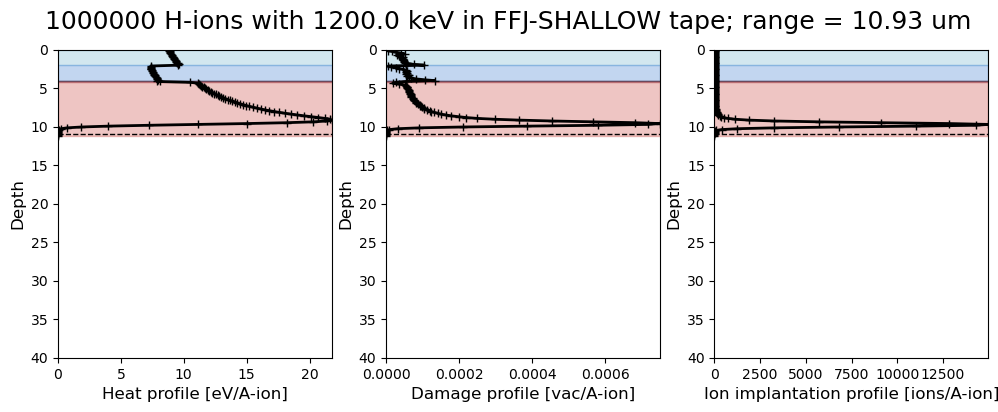

In [5]:
savedir = 'C:/Users/DANTE/Desktop/FacilitiesPaper'

species, energy, nions, tape = 'H', 1200e3, 1000000, 'ffj-shallow'
path_to_tape = "C:/Users/DANTE/Desktop/pysrimcc/{}.json".format(tape)

bounds, data = pysrimcc.runSRIM(species=species, energy=energy, ionsFlown=nions, path_to_tape=path_to_tape, calculation=1, savedir=savedir, vb=False)
pysrimcc.plotResults(bounds, data, species, energy, nions, tape)

## High resolution calculation of degraded proton through REBCO only

Based on the stopping power table, we find that the enegy of a 1200 keV proton incident on a YBCO tape (No-Cu) is degraded to 1008.8 keV when it enters the YBCO layer, having traversed 2 um of silver.

In [3]:
thicknesses = {
    'wAg1': 0, 
    'wYBCO': 200000, 
    'wLaMnO': 0, 
    'wMgO': 0, 
    'wY2O3': 0, 
    'wAl2O3': 0, 
    'wHastelloy': 0,  
    'wAg2': 0
}
species, energy, number = 'H', 2000e3, 1000000
bounds, ranges, frenkelPairs, implantedIons = runSRIM(species, energy, number, thicknesses, calculation=1, savedir='C:/Users/DANTE/ybco-only')

Completed 50000 ions in    391 seconds.
This run will take a total of  130.4 minutes.
Time elapsed 6.52 min, Ions flown 50000/1000000
Time elapsed 12.47 min, Ions flown 100000/1000000
Time elapsed 18.42 min, Ions flown 150000/1000000
Time elapsed 24.36 min, Ions flown 200000/1000000
Time elapsed 30.31 min, Ions flown 250000/1000000
Time elapsed 36.25 min, Ions flown 300000/1000000
Time elapsed 42.20 min, Ions flown 350000/1000000
Time elapsed 48.16 min, Ions flown 400000/1000000
Time elapsed 54.10 min, Ions flown 450000/1000000
Time elapsed 60.04 min, Ions flown 500000/1000000
Time elapsed 65.99 min, Ions flown 550000/1000000
Time elapsed 71.93 min, Ions flown 600000/1000000
Time elapsed 77.86 min, Ions flown 650000/1000000
Time elapsed 83.81 min, Ions flown 700000/1000000
Time elapsed 89.74 min, Ions flown 750000/1000000
Time elapsed 95.68 min, Ions flown 800000/1000000
Time elapsed 101.62 min, Ions flown 850000/1000000
Time elapsed 107.57 min, Ions flown 900000/1000000
Time elapsed 1

## How many ions need to be flow to converge their range?

nan 11


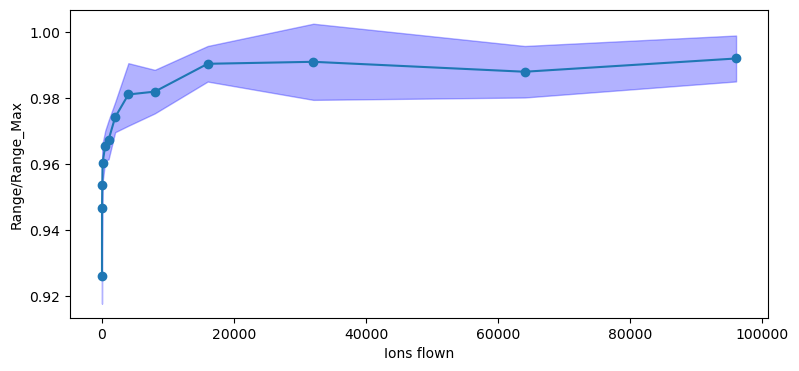

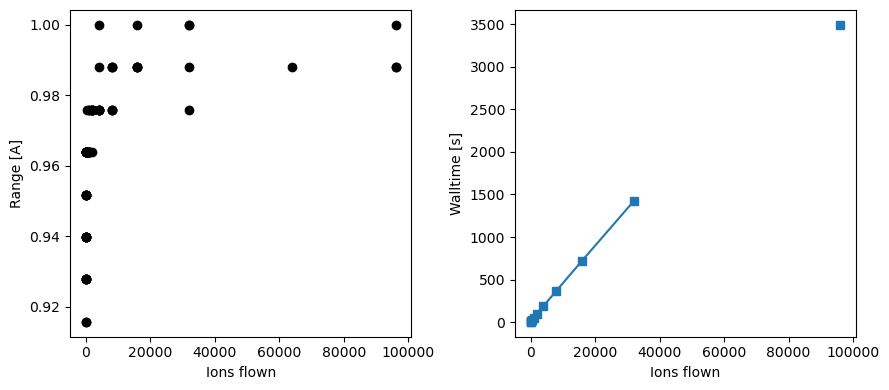

In [42]:
n = [5, 10, 50, 100, 500, 1000, 2000, 4000, 8000, 16000, 32000, 64000, 96000]
s = [1.773510456085205, 3.5156362056732178, 6.359252452850342, 10.21608281135559, 23.19873309135437, 47.684813022613525, 94.77883887290955, 187.01060581207275, 367.02242136001587, 722.0730588436127, 1422.1303071975708, np.nan, 3495.467268705368] 
r1 = [101255.0, 102570.0, 102570.0, 105200.0, 105200.0, 105200.0, 106515.0, 106515.0, 106515.0, np.nan, np.nan, np.nan, np.nan]
r2 = [102570.0, 105200.0, 103885.0, 105200.0, 105200.0, 105200.0, 105200.0, 107830.0, 106515.0, np.nan, np.nan, np.nan, np.nan]
r3 = [99940.0, 101255.0, 103885.0, 105200.0, 105200.0, 105200.0, 106515.0, 109145.0, np.nan, 107830.0, np.nan, np.nan, np.nan]
r4 = [101255.0, 102570.0, 105200.0, 103885.0, 105200.0, 106515.0, 106515.0, 106515.0, 107830.0, 107830.0, 107830.0, np.nan, np.nan]
r5 = [101255.0, 105200.0, 102570.0, 103885.0, 106515.0, 105200.0, 106515.0, 106515.0, 107830.0, 107830.0, 106515.0, np.nan, 109145.0]
r6 = [99940.0, 102570.0, 105200.0, 105200.0, 105200.0, 106515.0, 106515.0, 106515.0, 107830.0, 109145.0, 109145.0, np.nan, 107830.0]
r7 = [101255.0, 103885.0, 105200.0, 105200.0, 105200.0, 105200.0, 106515.0, 106515.0, 106515.0, 107830.0, 109145.0, 107830.0, 107830.0]

df = pd.DataFrame([r1, r2, r3, r4, r5, r6, r7])
mean = df.mean()
std = df.std()
for i, ss in enumerate(std):
    if np.isnan(ss):
        print(ss, i)
        std[i] = np.mean(std)
        
fig, ax = plt.subplots(1, 1, figsize=(9, 4))
ax.plot(n, mean/109145.0, marker='o')
ax.fill_between(n, (mean+std)/109145.0, (mean-std)/109145.0, alpha=.3, color='b')
ax.set_xlabel('Ions flown')
ax.set_ylabel('Range/Range_Max')


fig, ax = plt.subplots(1, 2, figsize=(9, 4))
for r in [r1, r2, r3, r4, r5, r6, r7]:
    ax[0].plot(n, np.array(r)/109145.0, marker='o', color='k', linestyle='None')
ax[1].plot(n, s, marker='s')

ax[0].set_xlabel('Ions flown')
ax[0].set_ylabel('Range [A]')
ax[1].set_xlabel('Ions flown')
ax[1].set_ylabel('Walltime [s]')
fig.tight_layout()

## How many ions need to be flown to converge the number of vacancies/A-ion

<IPython.core.display.Javascript object>


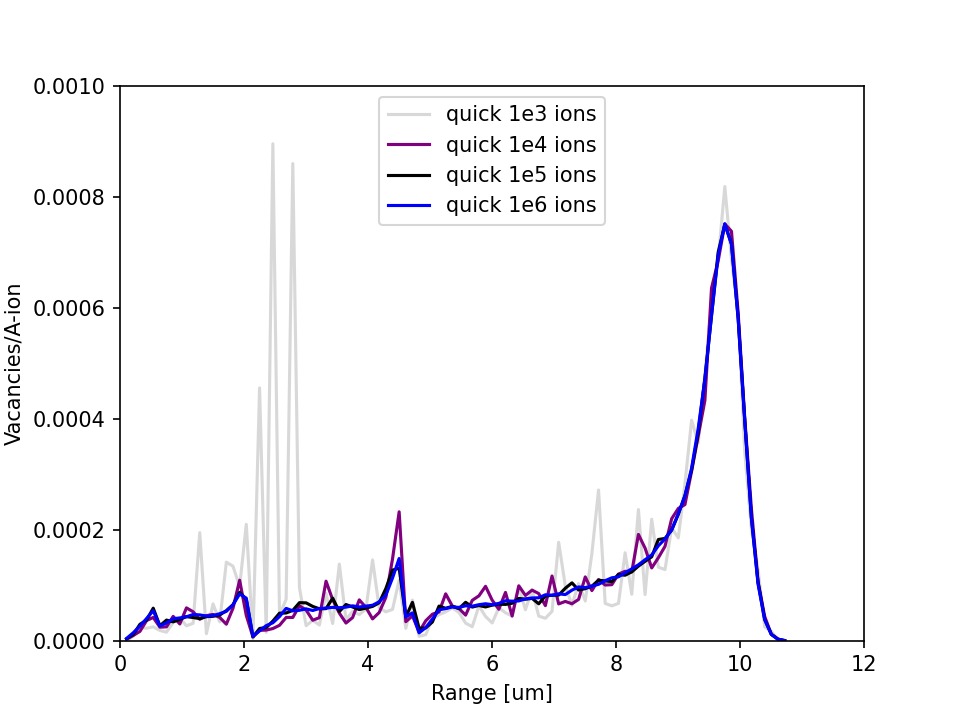

In [68]:
fig, ax = plt.subplots()

fname = 'YBCO-SRIM/ion-number-scaling/2023-10-26-14-23-18-435722-1000H-1200keV-1.txt'
data = pd.read_csv(fname, usecols=[0, 3], names=['r', 'v'], delim_whitespace=True, skiprows=1)
ax.plot(data['r'].values/1e4, data['v'].values, label='quick 1e3 ions', color='gray', alpha=.3)

fname = 'YBCO-SRIM/ion-number-scaling/2023-10-26-14-28-43-480619-10000H-1200keV-1.txt'
data = pd.read_csv(fname, usecols=[0, 3], names=['r', 'v'], delim_whitespace=True, skiprows=1)
ax.plot(data['r'].values/1e4, data['v'].values, label='quick 1e4 ions', color='purple')

fname = 'YBCO-SRIM/ion-number-scaling/2023-10-26-15-01-10-882928-100000H-1200keV-1.txt'
data = pd.read_csv(fname, usecols=[0, 3], names=['r', 'v'], delim_whitespace=True, skiprows=1)
ax.plot(data['r'].values/1e4, data['v'].values, label='quick 1e5 ions', color='k')

fname = 'YBCO-SRIM/ion-number-scaling/2023-10-26-07-24-07-028892-1000000H-1200keV-1.txt'
data = pd.read_csv(fname, usecols=[0, 3], names=['r', 'v'], delim_whitespace=True, skiprows=1)
ax.plot(data['r'].values/1e4, data['v'].values, label='quick 1e6 ions', color='b')

ax.set_ylabel('Vacancies/A-ion')
ax.set_xlabel('Range [um]')
ax.set_xlim(0, 12)
ax.set_ylim(0, 0.001)
ax.legend()

## Speedtesting